In [2]:
!pip install wbdata

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import wbdata

In [5]:
wbdata.search_indicators("GDP")

id                          name
--------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
5.51.01.10.gdp              Per capita GDP growth
6.0.GDP_current             GDP (current $)
6.0.GDP_growth              GDP growth (annual %)
6.0.GDP_usd                 GDP (constant 2005 $)
6.0.GDPpc_constant          GDP per capita, PPP (constant 2011 international $)
BG.GSR.NFSV.GD.ZS           Trade in services (% of GDP)
BG.KAC.FNEI.GD.PP.ZS        Gross private capital flows (% of GDP, PPP)
BG.KAC.FNEI.GD.ZS           Gross private capital flows (% of GDP)
BG.KLT.DINV.GD.PP.ZS        Gross foreign direct investment (% of GDP, PPP)
BG.KLT.DINV.GD.ZS           Gross foreign direct investment (% of GDP)
BI.WAG.TOTL.GD.ZS           Wage bill as a percentage of GDP
BM.GSR.MRCH.ZS              Merchandise imports (BOP): percentage of GDP (%)
BM.KLT.DINV.GD

In [9]:
 indicators = {'Indicator Name': [
           'Gross Domestic Product (GDP)',
           'Gross National Income (GNI)',
           'Inflation rate',
           'Unemployment rate',
           'Poverty rate',
           'Life expectancy',
           'Literacy rate',
           'Access to electricity',
           'Mobile phone subscriptions',
           'Government expenditure on education',
           'Foreign direct investment (FDI)',
           'Exports of goods and services',
           'Imports of goods and services',
           'Gross capital formation',
           'Agricultural land area',
           'Agricultural production index'
       ],
       'Indicator ID': [
           'NY.GDP.MKTP.CD',
           'NY.GNP.MKTP.CD',
           'FP.CPI.TOTL.ZG',
           'SL.UEM.TOTL.ZS',
           'SI.POV.NAHC',
           'SP.DYN.LE00.IN',
           'SE.ADT.LITR.ZS',
           'EG.ELC.ACCS.ZS',
           'IT.CEL.SETS.P2',
           'SE.XPD.TOTL.GB.ZS',
           'BX.KLT.DINV.WD.GD.ZS',
           'NE.EXP.GNFS.ZS',
           'NE.IMP.GNFS.ZS',
           'NE.GDI.TOTL.ZS',
           'AG.LND.AGRI.ZS',
           'AG.PRD.FOOD.XD'
       ]   }

In [10]:
indicators = pd.DataFrame(indicators)

In [11]:
indicators

,Indicator Name,Indicator ID
0,Gross Domestic Product (GDP),NY.GDP.MKTP.CD
1,Gross National Income (GNI),NY.GNP.MKTP.CD
2,Inflation rate,FP.CPI.TOTL.ZG
3,Unemployment rate,SL.UEM.TOTL.ZS
4,Poverty rate,SI.POV.NAHC
5,Life expectancy,SP.DYN.LE00.IN
6,Literacy rate,SE.ADT.LITR.ZS
7,Access to electricity,EG.ELC.ACCS.ZS
8,Mobile phone subscriptions,IT.CEL.SETS.P2
9,Government expenditure on education,SE.XPD.TOTL.GB.ZS


In [14]:
from datetime import datetime

In [16]:
start_date ='2015-01-01'
end_date ='2020-12-31'

start_date_obj = datetime.strptime(start_date,"%Y-%m-%d")
end_date_obj = datetime.strptime(end_date,"%Y-%m-%d")

data_date = (start_date_obj, end_date_obj)

In [18]:
type(data_date)

tuple

In [20]:
new_df = pd.DataFrame()

In [23]:
pd.DataFrame(wbdata.get_data('NY.GDP.MKTP.CD', country='all', data_date=data_date, pandas=True))

value
country                     date              
Africa Eastern and Southern 2020  9.274845e+11
                            2019  1.001017e+12
                            2018  1.007240e+12
                            2017  1.021119e+12
                            2016  8.827213e+11
...                                        ...
Zimbabwe                    2019  2.183223e+10
                            2018  3.415607e+10
                            2017  1.758489e+10
                            2016  2.054868e+10
                            2015  1.996312e+10

[1596 rows x 1 columns]

In [27]:
indicators['Indicator ID']

0           NY.GDP.MKTP.CD
1           NY.GNP.MKTP.CD
2           FP.CPI.TOTL.ZG
3           SL.UEM.TOTL.ZS
4              SI.POV.NAHC
5           SP.DYN.LE00.IN
6           SE.ADT.LITR.ZS
7           EG.ELC.ACCS.ZS
8           IT.CEL.SETS.P2
9        SE.XPD.TOTL.GB.ZS
10    BX.KLT.DINV.WD.GD.ZS
11          NE.EXP.GNFS.ZS
12          NE.IMP.GNFS.ZS
13          NE.GDI.TOTL.ZS
14          AG.LND.AGRI.ZS
15          AG.PRD.FOOD.XD
Name: Indicator ID, dtype: object

In [30]:
df=pd.DataFrame()

In [35]:
for i in indicators['Indicator ID']:
    new_df = wbdata.get_data(indicator=i, country='all', data_date=data_date, pandas=True)
    new_df = pd.DataFrame(new_df).reset_index()
    new_df.columns = ['country', 'year', indicators[indicators['Indicator ID'] == i]['Indicator Name'].values[0]]
    df = pd.concat([df,new_df],axis=1)
    

In [36]:
df.head()

,country,year,Gross Domestic Product (GDP),country,year,Gross National Income (GNI),country,year,Inflation rate,country,...,Imports of goods and services,country,year,Gross capital formation,country,year,Agricultural land area,country,year,Agricultural production index
0,Africa Eastern and Southern,2020,9.274845e+11,Africa Eastern and Southern,2020,9.050268e+11,Africa Eastern and Southern,2020,6.362961,Africa Eastern and Southern,...,23.672022,Africa Eastern and Southern,2020,20.978490,Africa Eastern and Southern,2020,44.248721,Africa Eastern and Southern,2020,NaN
1,Africa Eastern and Southern,2019,1.001017e+12,Africa Eastern and Southern,2019,9.718956e+11,Africa Eastern and Southern,2019,4.120246,Africa Eastern and Southern,...,26.459442,Africa Eastern and Southern,2019,22.520138,Africa Eastern and Southern,2019,44.194846,Africa Eastern and Southern,2019,NaN
2,Africa Eastern and Southern,2018,1.007240e+12,Africa Eastern and Southern,2018,9.763761e+11,Africa Eastern and Southern,2018,4.720811,Africa Eastern and Southern,...,28.257503,Africa Eastern and Southern,2018,21.861204,Africa Eastern and Southern,2018,44.168345,Africa Eastern and Southern,2018,NaN
3,Africa Eastern and Southern,2017,1.021119e+12,Africa Eastern and Southern,2017,9.896458e+11,Africa Eastern and Southern,2017,6.399343,Africa Eastern and Southern,...,24.815490,Africa Eastern and Southern,2017,24.546074,Africa Eastern and Southern,2017,44.045088,Africa Eastern and Southern,2017,NaN
4,Africa Eastern and Southern,2016,8.827213e+11,Africa Eastern and Southern,2016,8.598147e+11,Africa Eastern and Southern,2016,6.571396,Africa Eastern and Southern,...,26.196798,Africa Eastern and Southern,2016,23.806263,Africa Eastern and Southern,2016,43.901452,Africa Eastern and Southern,2016,NaN


In [37]:
df_1 = df.copy()

In [39]:
df_1 = df_1.drop(['country','year'],axis=1)

In [40]:
df_1

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,9.274845e+11,9.050268e+11,6.362961,7.517253,NaN,63.313856,71.889908,45.609604,71.060007,14.564090,1.349968,22.013630,23.672022,20.978490,44.248721,NaN
1,1.001017e+12,9.718956e+11,4.120246,6.873493,NaN,63.755674,71.574051,44.073912,68.752240,15.352720,1.502256,23.651724,26.459442,22.520138,44.194846,NaN
2,1.007240e+12,9.763761e+11,4.720811,6.695958,NaN,63.365858,70.420250,42.880977,72.279077,17.306705,1.345315,25.133678,28.257503,21.861204,44.168345,NaN
3,1.021119e+12,9.896458e+11,6.399343,6.687952,NaN,62.922385,69.999451,40.092163,64.226496,17.150761,0.983252,21.570950,24.815490,24.546074,44.045088,NaN
4,8.827213e+11,8.598147e+11,6.571396,6.613772,NaN,62.444045,70.059601,38.733352,64.284955,17.198811,1.892862,21.568935,26.196798,23.806263,43.901452,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2.183223e+10,2.148784e+10,255.304991,4.833000,38.3,61.292000,NaN,46.781475,85.940989,NaN,1.142806,27.163459,25.524111,13.799352,41.876696,92.07
1592,3.415607e+10,3.344290e+10,10.618866,4.796000,NaN,61.414000,NaN,45.572647,85.761588,19.039841,2.101721,26.163973,28.386297,14.148306,41.876696,115.03
1593,1.758489e+10,1.559375e+10,0.893962,4.785000,30.4,60.709000,NaN,44.178635,95.532557,20.874201,1.746885,19.658905,30.370807,9.700147,41.876696,112.85
1594,2.054868e+10,1.800259e+10,-1.543670,4.788000,NaN,60.306000,NaN,42.561729,89.110840,23.527081,1.669274,19.943532,31.275493,9.861371,41.876696,98.10


In [41]:
df.iloc[:,0:2]

,country,year
0,Africa Eastern and Southern,2020
1,Africa Eastern and Southern,2019
2,Africa Eastern and Southern,2018
3,Africa Eastern and Southern,2017
4,Africa Eastern and Southern,2016
...,...,...
1591,Zimbabwe,2019
1592,Zimbabwe,2018
1593,Zimbabwe,2017
1594,Zimbabwe,2016


In [42]:
df_1 = pd.concat([df.iloc[:,0:2], df_1],axis=1)

In [43]:
df_1

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Africa Eastern and Southern,2020,9.274845e+11,9.050268e+11,6.362961,7.517253,NaN,63.313856,71.889908,45.609604,71.060007,14.564090,1.349968,22.013630,23.672022,20.978490,44.248721,NaN
1,Africa Eastern and Southern,2019,1.001017e+12,9.718956e+11,4.120246,6.873493,NaN,63.755674,71.574051,44.073912,68.752240,15.352720,1.502256,23.651724,26.459442,22.520138,44.194846,NaN
2,Africa Eastern and Southern,2018,1.007240e+12,9.763761e+11,4.720811,6.695958,NaN,63.365858,70.420250,42.880977,72.279077,17.306705,1.345315,25.133678,28.257503,21.861204,44.168345,NaN
3,Africa Eastern and Southern,2017,1.021119e+12,9.896458e+11,6.399343,6.687952,NaN,62.922385,69.999451,40.092163,64.226496,17.150761,0.983252,21.570950,24.815490,24.546074,44.045088,NaN
4,Africa Eastern and Southern,2016,8.827213e+11,8.598147e+11,6.571396,6.613772,NaN,62.444045,70.059601,38.733352,64.284955,17.198811,1.892862,21.568935,26.196798,23.806263,43.901452,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Zimbabwe,2019,2.183223e+10,2.148784e+10,255.304991,4.833000,38.3,61.292000,NaN,46.781475,85.940989,NaN,1.142806,27.163459,25.524111,13.799352,41.876696,92.07
1592,Zimbabwe,2018,3.415607e+10,3.344290e+10,10.618866,4.796000,NaN,61.414000,NaN,45.572647,85.761588,19.039841,2.101721,26.163973,28.386297,14.148306,41.876696,115.03
1593,Zimbabwe,2017,1.758489e+10,1.559375e+10,0.893962,4.785000,30.4,60.709000,NaN,44.178635,95.532557,20.874201,1.746885,19.658905,30.370807,9.700147,41.876696,112.85
1594,Zimbabwe,2016,2.054868e+10,1.800259e+10,-1.543670,4.788000,NaN,60.306000,NaN,42.561729,89.110840,23.527081,1.669274,19.943532,31.275493,9.861371,41.876696,98.10


In [44]:
countries=['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States']

In [45]:
dff = df_1[df_1['country'].isin(countries)]

In [46]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
336,Argentina,2020,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.82
337,Argentina,2019,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.94
338,Argentina,2018,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999000,99.003868,99.989578,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.41
339,Argentina,2017,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.07
340,Argentina,2016,5.575314e+11,5.452507e+11,NaN,8.111,30.3,76.308000,99.125008,99.849579,145.917957,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,100.09
1532,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.35
1533,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.95
1534,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.85


In [47]:
dff.shape

(102, 18)

In [49]:
dff.reset_index(drop=True,inplace=True)

In [50]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.82
1,Argentina,2019,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.94
2,Argentina,2018,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999000,99.003868,99.989578,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.41
3,Argentina,2017,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.07
4,Argentina,2016,5.575314e+11,5.452507e+11,NaN,8.111,30.3,76.308000,99.125008,99.849579,145.917957,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,100.09
98,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.35
99,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.95
100,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.85


In [51]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.82
1,Argentina,2019,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.94
2,Argentina,2018,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999,99.003868,99.989578,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.41
3,Argentina,2017,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.07
4,Argentina,2016,5.575314e+11,5.452507e+11,NaN,8.111,30.3,76.308,99.125008,99.849579,145.917957,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.94


In [53]:
dff.shape

(102, 18)

In [54]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              102 non-null    object 
 1   year                                 102 non-null    object 
 2   Gross Domestic Product (GDP)         102 non-null    float64
 3   Gross National Income (GNI)          102 non-null    float64
 4   Inflation rate                       96 non-null     float64
 5   Unemployment rate                    102 non-null    float64
 6   Poverty rate                         35 non-null     float64
 7   Life expectancy                      102 non-null    float64
 8   Literacy rate                        30 non-null     float64
 9   Access to electricity                102 non-null    float64
 10  Mobile phone subscriptions           102 non-null    float64
 11  Government expenditure on educat

In [55]:
dff['year'] = pd.to_datetime(dff['year'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19176\3412896312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['year'] = pd.to_datetime(dff['year'])


In [56]:
from warnings import filterwarnings
filterwarnings("ignore")



In [57]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              102 non-null    object        
 1   year                                 102 non-null    datetime64[ns]
 2   Gross Domestic Product (GDP)         102 non-null    float64       
 3   Gross National Income (GNI)          102 non-null    float64       
 4   Inflation rate                       96 non-null     float64       
 5   Unemployment rate                    102 non-null    float64       
 6   Poverty rate                         35 non-null     float64       
 7   Life expectancy                      102 non-null    float64       
 8   Literacy rate                        30 non-null     float64       
 9   Access to electricity                102 non-null    float64       
 10  Mobile phone s

In [58]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Domestic Product (GDP),102.0,3.571764e+12,5.018684e+12,3.235855e+11,9.528127e+11,1.819426e+12,2.872879e+12,2.138098e+13
Gross National Income (GNI),102.0,3.597522e+12,5.097717e+12,3.152941e+11,9.223936e+11,1.795642e+12,2.855828e+12,2.176454e+13
Inflation rate,96.0,2.856820e+00,3.106740e+00,-2.093333e+00,1.026316e+00,1.948958e+00,3.643184e+00,1.633246e+01
Unemployment rate,102.0,7.806275e+00,5.702775e+00,2.400000e+00,4.337500e+00,5.655000e+00,9.745000e+00,2.922000e+01
Poverty rate,35.0,1.721143e+01,1.143685e+01,0.000000e+00,1.020000e+01,1.500000e+01,2.030000e+01,4.390000e+01
Life expectancy,102.0,7.744762e+01,5.246465e+00,6.395000e+01,7.450200e+01,7.765350e+01,8.201159e+01,8.461561e+01
Literacy rate,30.0,9.488450e+01,4.619322e+00,7.437299e+01,9.456912e+01,9.537844e+01,9.681622e+01,9.934910e+01
Access to electricity,102.0,9.854558e+01,3.961923e+00,8.390000e+01,9.970272e+01,1.000000e+02,1.000000e+02,1.000000e+02
Mobile phone subscriptions,102.0,1.165805e+02,2.220001e+01,7.567324e+01,9.754518e+01,1.168978e+02,1.308190e+02,1.669433e+02
Government expenditure on education,97.0,1.358730e+01,3.778289e+00,7.310000e+00,1.099916e+01,1.326392e+01,1.621811e+01,2.494862e+01


In [60]:
dff['GDP_BN'] = dff['Gross Domestic Product (GDP)']/(10**9)
dff['GNI_BN'] = dff['Gross National Income (GNI)']/(10**9)

In [62]:
selected_cols = dff.columns[4:]

In [66]:
dff[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,96.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,102.0,8.0,6.0,2.0,4.0,6.0,10.0,29.0
Poverty rate,35.0,17.0,11.0,0.0,10.0,15.0,20.0,44.0
Life expectancy,102.0,77.0,5.0,64.0,75.0,78.0,82.0,85.0
Literacy rate,30.0,95.0,5.0,74.0,95.0,95.0,97.0,99.0
Access to electricity,102.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,102.0,117.0,22.0,76.0,98.0,117.0,131.0,167.0
Government expenditure on education,97.0,14.0,4.0,7.0,11.0,13.0,16.0,25.0
Foreign direct investment (FDI),102.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,102.0,25.0,9.0,10.0,18.0,26.0,31.0,47.0


# data visualization

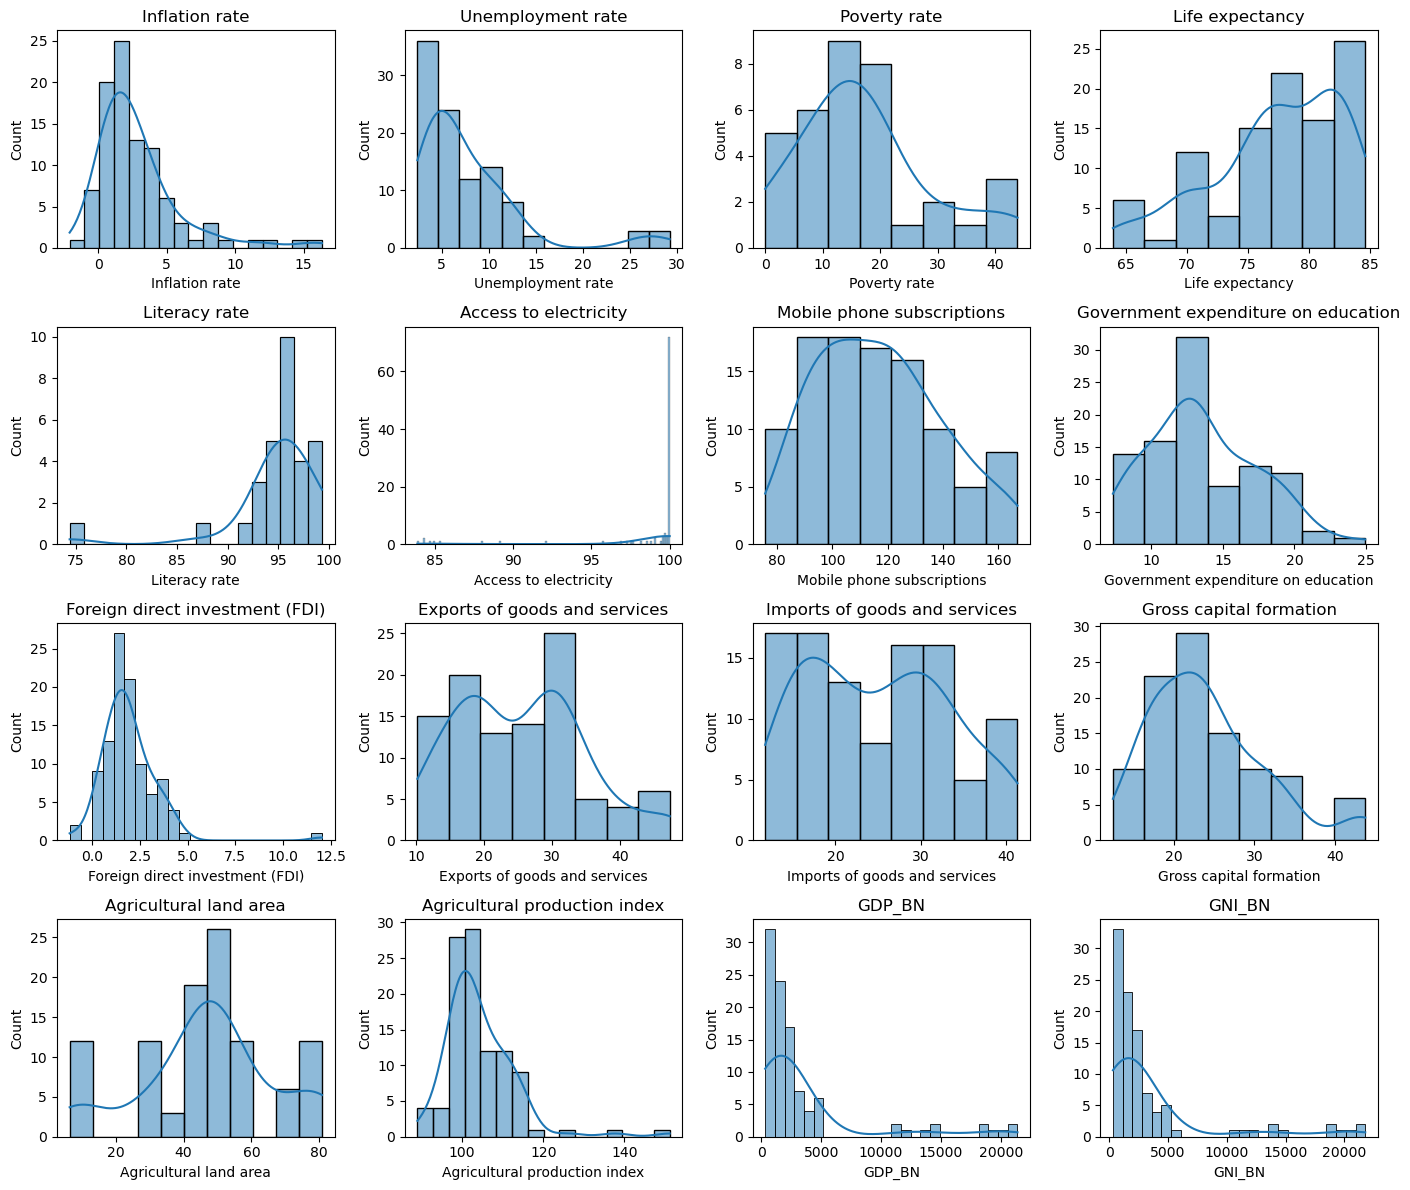

In [78]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,12))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(data=dff, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)
    
    
plt.tight_layout()
plt.show()

In [73]:
dff[selected_cols].skew().sort_values()

Literacy rate                         -3.264460
Access to electricity                 -2.974697
Life expectancy                       -0.772420
Agricultural land area                -0.246207
Imports of goods and services          0.222309
Mobile phone subscriptions             0.376596
Exports of goods and services          0.419613
Government expenditure on education    0.475650
Poverty rate                           0.826257
Gross capital formation                1.001662
Inflation rate                         2.166659
Agricultural production index          2.246676
Unemployment rate                      2.346890
GDP_BN                                 2.456103
GNI_BN                                 2.469637
Foreign direct investment (FDI)        2.998065
dtype: float64

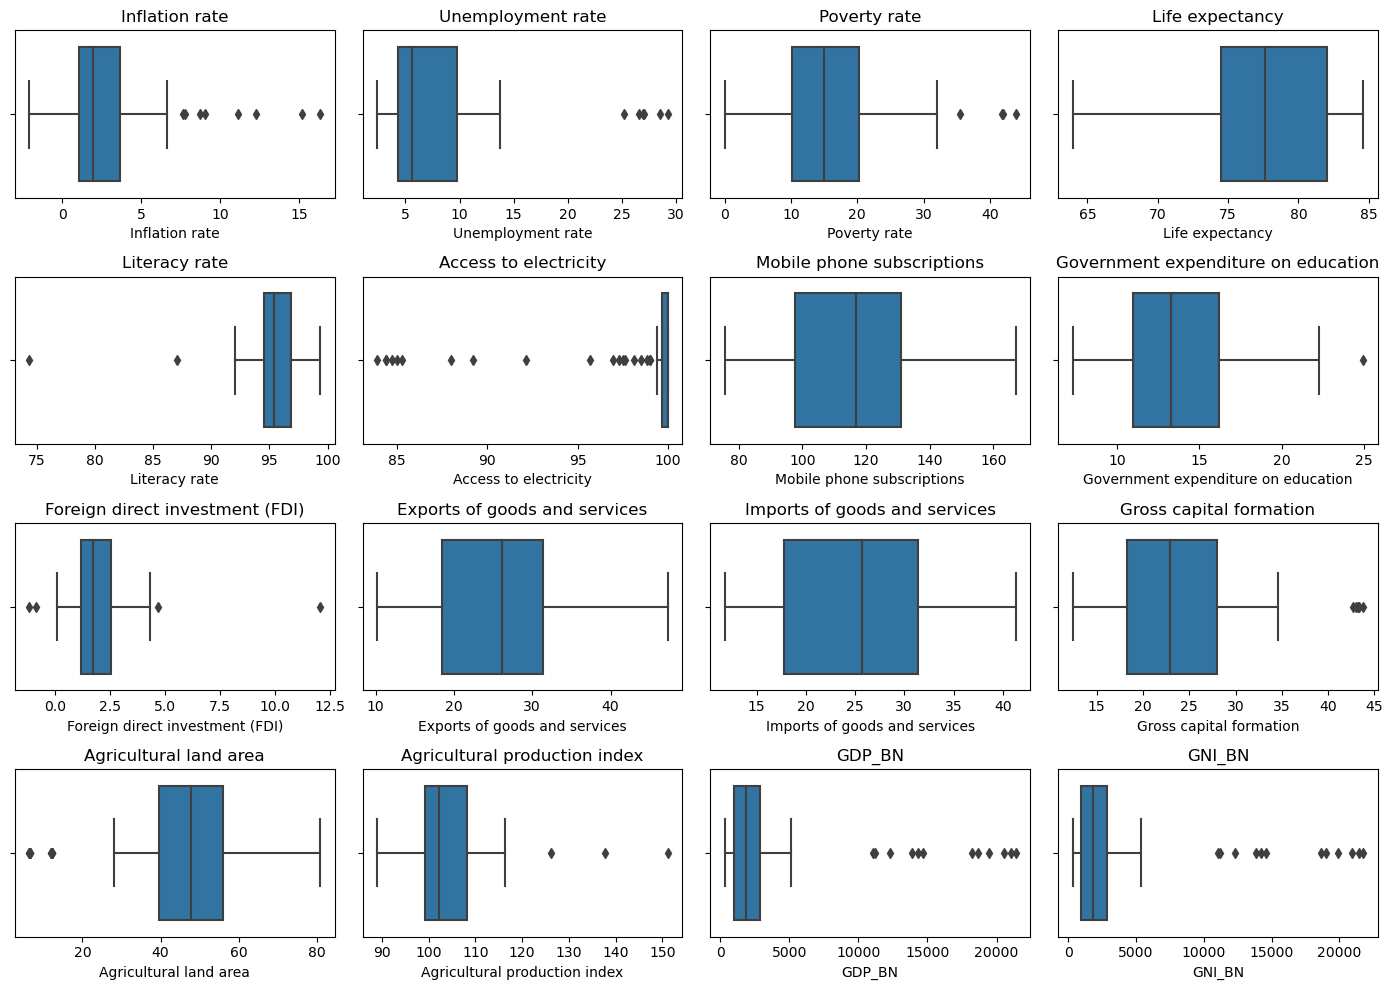

In [75]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()
 
for i, col in enumerate(selected_cols):
    sns.boxplot(data=dff, x=col, ax=axs[i])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [83]:
def outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    return (x < q1-1.5*iqr) | (x > q3+1.5*iqr)

In [86]:
outlier_percentages = []

for col in selected_cols:
    x = dff[col]
    outliers = outlier(x)
    outlier_percentage = np.mean(outliers)*100
    outlier_percentages.append(outlier_percentage)
    
    
result_df = pd.DataFrame({'column':selected_cols, 'outlier_percentage':outlier_percentages})
result_df = result_df.sort_values('outlier_percentage', ascending=False)

In [88]:
result_df.round()

,column,outlier_percentage
5,Access to electricity,19.0
12,Agricultural land area,12.0
14,GDP_BN,12.0
15,GNI_BN,12.0
0,Inflation rate,8.0
1,Unemployment rate,6.0
11,Gross capital formation,6.0
2,Poverty rate,4.0
8,Foreign direct investment (FDI),4.0
13,Agricultural production index,3.0


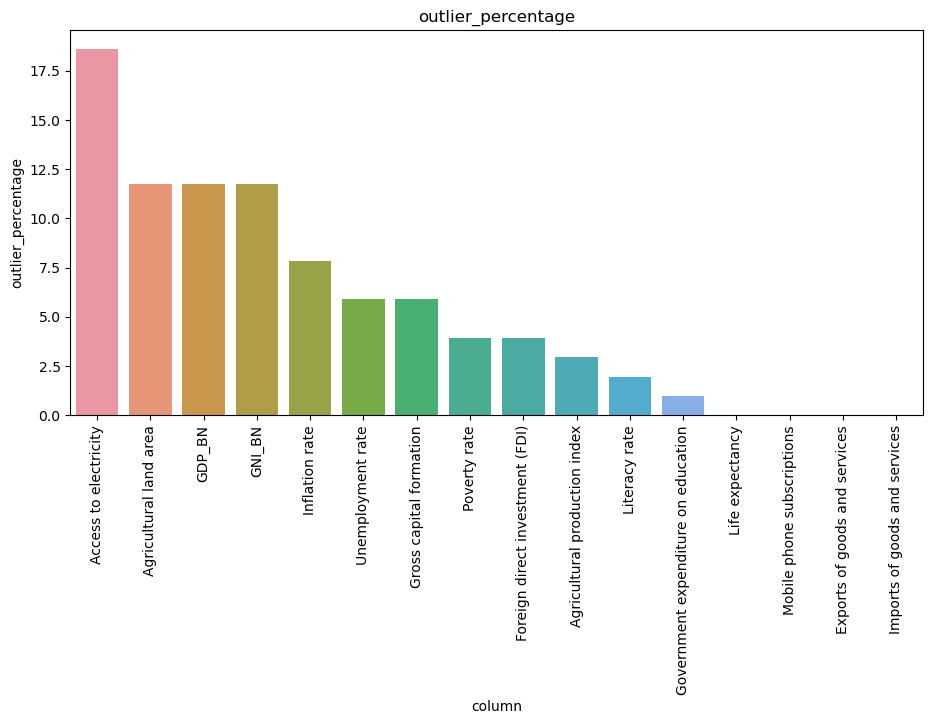

In [91]:
plt.figure(figsize=(11,5))
sns.barplot(x=result_df['column'], y=result_df['outlier_percentage'])
plt.title("outlier_percentage")
plt.xticks(rotation=90)
plt.show()

In [92]:
dff.isnull().sum()

country                                 0
year                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           67
Life expectancy                         0
Literacy rate                          72
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education     5
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

# correlation

In [93]:
dff.corr()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
Gross Domestic Product (GDP),1.000000,0.999877,-0.220462,-0.286381,-0.620850,0.169551,0.046011,0.191673,-0.153472,-0.236657,-0.052292,-0.376812,-0.369748,0.256211,-0.050011,-0.175055,1.000000,0.999877
Gross National Income (GNI),0.999877,1.000000,-0.222798,-0.286121,-0.621039,0.172916,0.047395,0.191853,-0.149584,-0.238792,-0.055079,-0.375439,-0.368266,0.248886,-0.053373,-0.176501,0.999877,1.000000
Inflation rate,-0.220462,-0.222798,1.000000,0.324884,0.006081,-0.452881,-0.057579,-0.206033,-0.205542,0.255232,0.043067,-0.081807,-0.001922,0.092673,0.084677,0.189748,-0.220462,-0.222798
Unemployment rate,-0.286381,-0.286121,0.324884,1.000000,0.312908,-0.495176,-0.123442,-0.723369,0.344947,0.249053,-0.159698,-0.013540,-0.026504,-0.413354,0.321482,0.047695,-0.286381,-0.286121
Poverty rate,-0.620850,-0.621039,0.006081,0.312908,1.000000,0.020823,0.118925,0.168456,0.075160,-0.078581,0.041035,0.207266,0.232278,-0.812122,-0.179585,0.201252,-0.620850,-0.621039
Life expectancy,0.169551,0.172916,-0.452881,-0.495176,0.020823,1.000000,0.445276,0.725867,-0.110101,-0.752553,0.056107,0.160819,0.142924,-0.087137,-0.385819,-0.326744,0.169551,0.172916
Literacy rate,0.046011,0.047395,-0.057579,-0.123442,0.118925,0.445276,1.000000,0.345048,0.234496,-0.323504,-0.058965,0.059160,-0.011952,-0.037390,-0.163344,-0.107628,0.046011,0.047395
Access to electricity,0.191673,0.191853,-0.206033,-0.723369,0.168456,0.725867,0.345048,1.000000,-0.306707,-0.449921,0.160481,0.022973,0.011837,0.129710,-0.415748,0.000239,0.191673,0.191853
Mobile phone subscriptions,-0.153472,-0.149584,-0.205542,0.344947,0.075160,-0.110101,0.234496,-0.306707,1.000000,0.032539,-0.257949,-0.004979,-0.117919,-0.217518,0.178629,-0.170834,-0.153472,-0.149584
Government expenditure on education,-0.236657,-0.238792,0.255232,0.249053,-0.078581,-0.752553,-0.323504,-0.449921,0.032539,1.000000,0.059994,-0.054370,-0.051382,0.066868,0.455042,0.410575,-0.236657,-0.238792


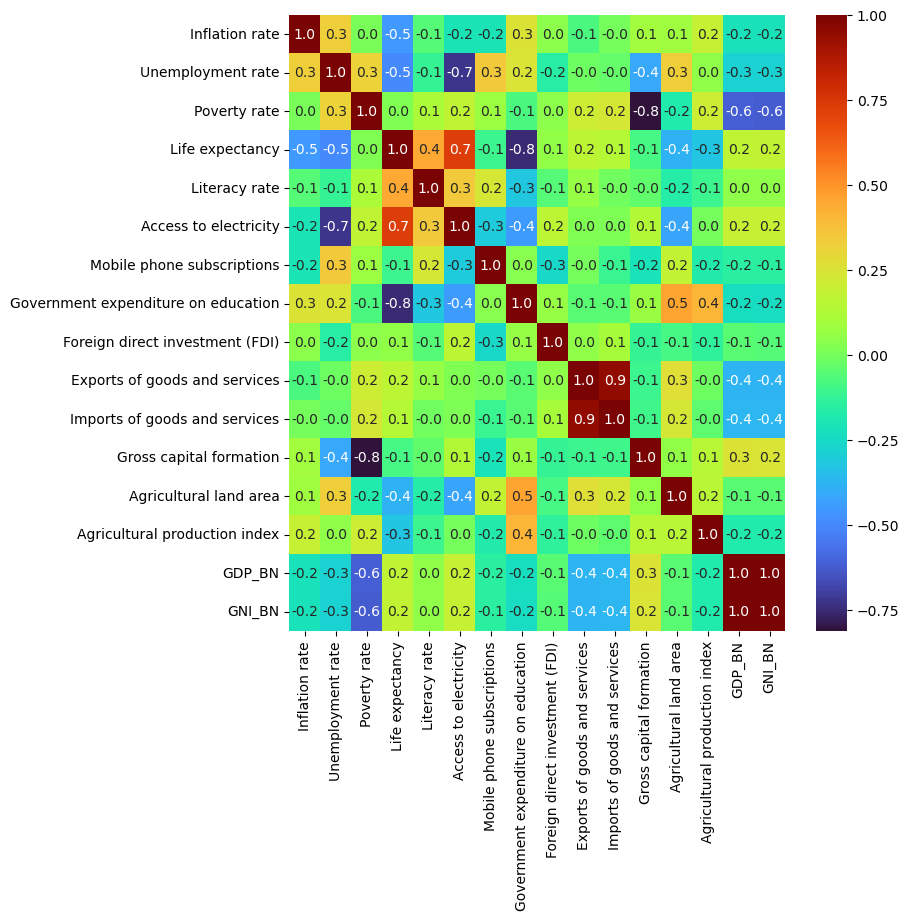

In [95]:
plt.figure(figsize=(8,8))
sns.heatmap(dff[selected_cols].corr(), annot=True, fmt='.1f', cmap='turbo')
plt.show()

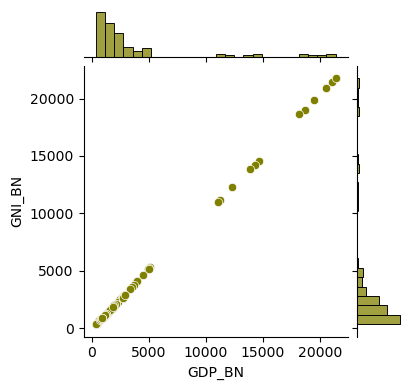

In [98]:
sns.jointplot(x='GDP_BN', y='GNI_BN', data=dff, height=4, color='olive')
plt.show()

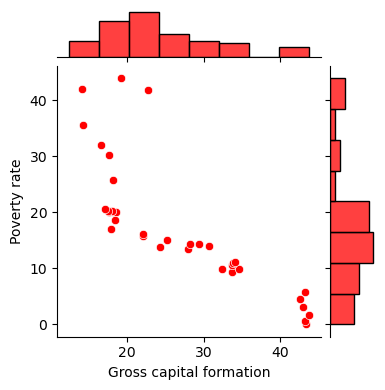

In [100]:
sns.jointplot(x='Gross capital formation', y='Poverty rate', data=dff, height=4, color='red')
plt.show()

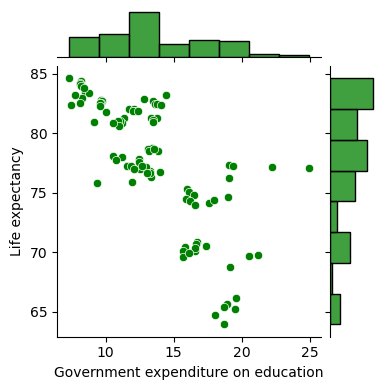

In [102]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=dff, height=4, color='green')
plt.show()

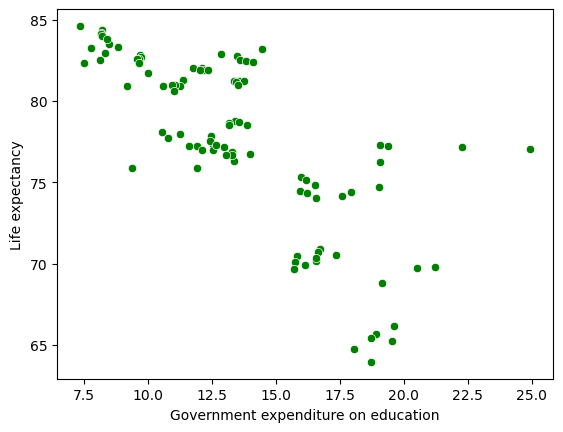

In [104]:
sns.scatterplot(x='Government expenditure on education', y='Life expectancy', data=dff, color='green')
plt.show()

# top 3 countries 

In [109]:
def top_3(data, parameter):
    year_list = data['year'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list, index=[1,2,3])
    
    for year in year_list:
        df_year = data[data['year'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        result_df[year] = value
        
    return result_df

In [110]:
from IPython.display import display

In [112]:
for i in selected_cols:
    result = top_3(dff,i)
    print(i)
    display(result)
    print('-------------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Brazil,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Turkiye,Turkiye,Mexico,Mexico,South Africa,India
3,Indonesia,South Africa,South Africa,South Africa,Brazil,Saudi Arabia


-------------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Italy,Brazil,Brazil,Turkiye,Brazil
3,France,Brazil,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Argentina,Argentina,Mexico,Argentina,Mexico
2,Turkiye,Italy,Italy,Argentina,Italy,Argentina
3,Indonesia,United Kingdom,United Kingdom,Italy,Germany,Italy


-------------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,Australia
3,Australia,France,France,Australia,Australia,Italy


-------------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Argentina,Argentina,Turkiye,Italy,Italy,Saudi Arabia
2,Turkiye,Turkiye,Saudi Arabia,Argentina,Turkiye,China
3,Indonesia,Indonesia,Mexico,China,South Africa,Indonesia


-------------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,United States,United States,Argentina,United States,Argentina,Argentina
2,Saudi Arabia,United Kingdom,Australia,Saudi Arabia,Australia,Australia
3,Canada,Canada,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Indonesia,Indonesia,South Africa,South Africa,South Africa
2,South Africa,South Africa,South Africa,Japan,Japan,Japan
3,Italy,Argentina,Argentina,Italy,Italy,Indonesia


-------------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Indonesia,Saudi Arabia,Saudi Arabia,Saudi Arabia,South Africa,South Africa
2,Mexico,Indonesia,South Africa,South Africa,Saudi Arabia,Indonesia
3,South Africa,South Africa,Mexico,India,Indonesia,Saudi Arabia


-------------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Canada,United Kingdom,United Kingdom,Australia,Brazil,Germany
2,Brazil,Brazil,Australia,Germany,Australia,Mexico
3,Australia,Mexico,Brazil,Brazil,Canada,Brazil


-------------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Germany,Germany,Germany,Germany,Germany
2,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
3,Saudi Arabia,Canada,Saudi Arabia,Saudi Arabia,Saudi Arabia,Italy


-------------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Mexico,Germany,Mexico,Germany,Mexico
2,Saudi Arabia,Germany,Mexico,Germany,Mexico,Germany
3,Mexico,Canada,Canada,Canada,Canada,Turkiye


-------------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Saudi Arabia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Indonesia,Saudi Arabia,India,India,India,Turkiye


-------------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Canada,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Saudi Arabia,Indonesia,Indonesia,India,India
3,France,United States,India,India,Argentina,Turkiye


-------------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------------


In [116]:
def bottom_3(data, parameter):
    year_list = data['year'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list, index=[1,2,3])
    
    for year in year_list:
        df_year = data[data['year'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).tail(3).index
        result_df[year] = value
        
    return result_df

In [117]:
from IPython.display import display

In [118]:
for i in selected_cols:
    result = bottom_3(dff,i)
    print(i)
    display(result)
    print('-------------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Italy,Argentina,Japan,Italy,Japan,Argentina
2,France,Italy,Argentina,Japan,Argentina,Japan
3,Argentina,Japan,Saudi Arabia,Argentina,Saudi Arabia,Italy


-------------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,Indonesia,Germany,Germany,Germany,Mexico,Indonesia
2,Mexico,Mexico,Mexico,Mexico,Germany,Germany
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Canada,Canada,Canada,Brazil,Brazil,Turkiye
2,Brazil,Brazil,Brazil,United Kingdom,United Kingdom,United Kingdom
3,United States,United States,United States,United States,United States,United States


-------------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Indonesia,India,India,India,India,Mexico
2,India,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa


-------------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,South Africa,China,Turkiye,Canada,Canada
2,United Kingdom,United Kingdom,Canada,United Kingdom,Brazil,Brazil
3,United States,United States,United States,United States,United States,United States


-------------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,India
2,India,India,India,India,India,Indonesia
3,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa


-------------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Mexico,Mexico,Mexico,Turkiye,Brazil,Brazil
2,Canada,Canada,Canada,Canada,Canada,Canada
3,India,India,India,India,India,India


-------------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Japan,France,France,France,Italy,France
2,Italy,Japan,Italy,Italy,Japan,Mexico
3,Saudi Arabia,Italy,Japan,Japan,Mexico,Brazil


-------------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Italy,South Africa,South Africa,Saudi Arabia,Japan,United States
2,South Africa,Argentina,Japan,Japan,Saudi Arabia,France
3,Japan,Indonesia,Saudi Arabia,United Kingdom,United Kingdom,Italy


-------------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,Brazil,Argentina,Brazil,Brazil,Japan,Argentina
2,United States,Brazil,United States,Argentina,Brazil,Japan
3,Argentina,United States,Argentina,United States,United States,United States


-------------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,Argentina,Brazil,Indonesia
2,Brazil,Argentina,Argentina,United States,Argentina,Argentina
3,Argentina,Brazil,Brazil,Brazil,United States,United States


-------------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,Brazil,Italy,Italy,Argentina,South Africa,Brazil
2,Italy,South Africa,South Africa,South Africa,Brazil,Argentina
3,Argentina,Brazil,Brazil,Brazil,Argentina,South Africa


-------------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
2,Japan,Japan,Japan,Japan,Japan,Japan
3,Canada,Canada,Canada,Canada,Canada,Canada


-------------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Mexico,Germany,Japan,Australia,France,Germany
2,India,South Africa,Italy,France,Germany,France
3,United States,France,Germany,Germany,Australia,Australia


-------------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Turkiye,Turkiye,Saudi Arabia
2,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
3,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa


-------------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Turkiye,Turkiye,Turkiye
2,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
3,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa


-------------------------------------------------------


In [123]:
dff['year_o'] = dff['year'].dt.year

In [124]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o
0,Argentina,2020-01-01,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,...,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.82,385.540225,375.535785,2020
1,Argentina,2019-01-01,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,...,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.94,447.754609,430.166721,2019
2,Argentina,2018-01-01,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999000,99.003868,99.989578,...,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.41,524.819743,506.093901,2018
3,Argentina,2017-01-01,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,...,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.07,643.628665,627.200729,2017
4,Argentina,2016-01-01,5.575314e+11,5.452507e+11,NaN,8.111,30.3,76.308000,99.125008,99.849579,...,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.94,557.531376,545.250717,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,United States,2019-01-01,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,...,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,100.09,21380.976119,21764.537000,2019
98,United States,2018-01-01,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,...,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.35,20533.057312,20937.355000,2018
99,United States,2017-01-01,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,...,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.95,19477.336549,19885.551000,2017
100,United States,2016-01-01,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,...,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.85,18695.110842,19020.479000,2016


# life Expectancy

In [126]:
life_expectancy = pd.pivot_table(columns='year_o', index='country', values='Life expectancy', data=dff, aggfunc='mean').round(1)

In [128]:
life_expectancy['percentage_change'] = round((life_expectancy[2020] - life_expectancy[2015])*100/life_expectancy[2015],1)

In [133]:
life_expectancy = life_expectancy.sort_values(ascending=False, by='percentage_change')


In [134]:
life_expectancy

year_o,2015,2016,2017,2018,2019,2020,percentage_change
country,,,,,,,
South Africa,64.0,64.7,65.4,65.7,66.2,65.3,2.0
China,77.0,77.2,77.2,77.7,78.0,78.1,1.4
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
India,69.6,70.1,70.5,70.7,70.9,70.2,0.9
Germany,80.6,81.0,81.0,80.9,81.3,80.9,0.4
France,82.3,82.6,82.6,82.7,82.8,82.2,-0.1
United Kingdom,81.0,81.2,81.3,81.3,81.2,80.9,-0.1
Canada,81.9,81.9,81.9,82.0,82.0,81.7,-0.2


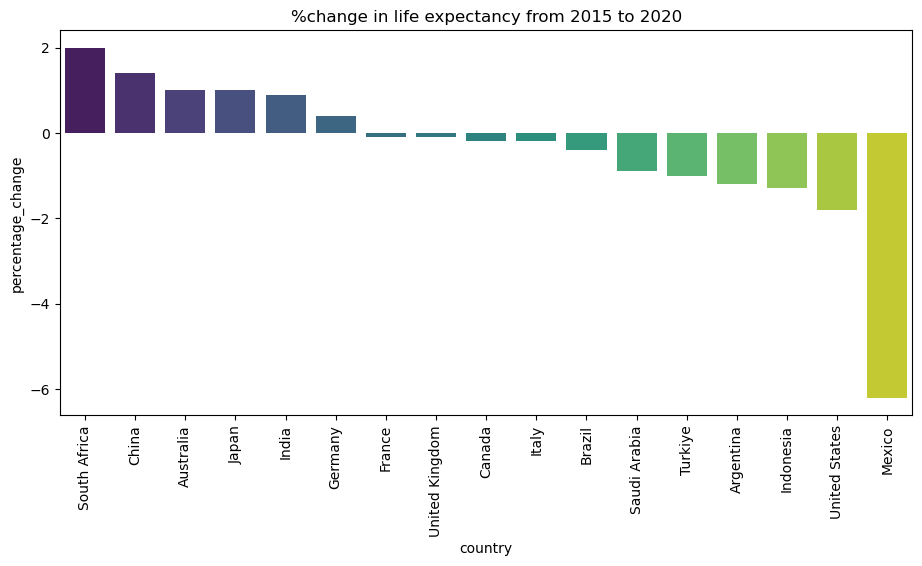

In [148]:
plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['percentage_change'], palette='viridis')
plt.title("%change in life expectancy from 2015 to 2020")
plt.xticks(rotation=90)
plt.show()

# FDI

In [150]:
FDI = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=dff, aggfunc='mean').round(1)

In [151]:
FDI['percentage_change'] = round((FDI[2020] - FDI[2015])*100/FDI[2015],1)

In [152]:
FDI = FDI.sort_values(ascending=False, by='percentage_change')

In [153]:
FDI

year_o,2015,2016,2017,2018,2019,2020,percentage_change
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
Germany,1.9,1.9,3.0,4.2,1.8,3.7,94.7
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.1,3.6,2.9,3.1,2.3,2.9,-6.5
Indonesia,2.3,0.5,2.0,1.8,2.2,1.8,-21.7
China,2.2,1.6,1.3,1.7,1.3,1.7,-22.7
United Kingdom,1.5,12.0,4.7,-0.9,0.1,1.1,-26.7
Brazil,3.6,4.1,3.3,4.1,3.7,2.6,-27.8


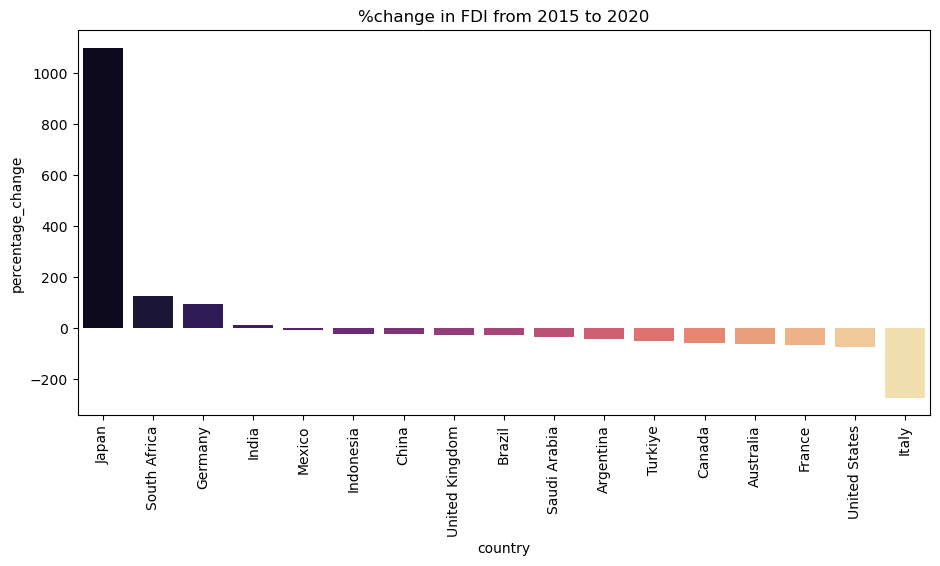

In [157]:
plt.figure(figsize=(11,5))
sns.barplot(x=FDI.index, y=FDI['percentage_change'], palette='magma')
plt.title("%change in FDI from 2015 to 2020")
plt.xticks(rotation=90)
plt.show()

# Exim

In [159]:
dff['net_exim_bal'] = dff['Exports of goods and services'] - dff['Imports of goods and services']

In [160]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,net_exim_bal
0,Argentina,2020-01-01,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892,NaN,100.000000,...,1.224943,16.610872,13.608927,14.130595,39.603229,109.82,385.540225,375.535785,2020,3.001945
1,Argentina,2019-01-01,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284,NaN,100.000000,...,1.485007,17.924878,14.705737,14.210030,39.603229,112.94,447.754609,430.166721,2019,3.219142
2,Argentina,2018-01-01,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999,99.003868,99.989578,...,2.232532,14.436686,16.325850,16.613885,39.603229,97.41,524.819743,506.093901,2018,-1.889164
3,Argentina,2017-01-01,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833,NaN,100.000000,...,1.789364,11.320283,13.969318,18.212567,40.647424,106.07,643.628665,627.200729,2017,-2.649034
4,Argentina,2016-01-01,5.575314e+11,5.452507e+11,NaN,8.111,30.3,76.308,99.125008,99.849579,...,0.584750,12.527095,13.566793,17.663228,41.716051,100.94,557.531376,545.250717,2016,-1.039698


In [162]:
exim = pd.pivot_table(index='country', columns='year', values='net_exim_bal', aggfunc='mean', data=dff).round(2)
exim

year,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
country,,,,,,
Argentina,-1.07,-1.04,-2.65,-1.89,3.22,3.00
Australia,-1.49,-2.28,0.51,0.36,2.48,3.78
Brazil,-1.15,0.40,0.72,0.39,-0.64,0.70
Canada,-2.46,-2.36,-2.19,-1.89,-1.60,-2.06
China,3.24,2.27,1.75,0.66,0.93,2.42
France,-0.57,-0.61,-1.06,-1.01,-0.96,-1.96
Germany,7.60,7.38,7.09,6.10,5.65,5.63
India,-2.30,-1.77,-3.16,-3.76,-2.58,-0.39
Indonesia,0.38,0.76,1.00,-1.07,-0.44,1.57


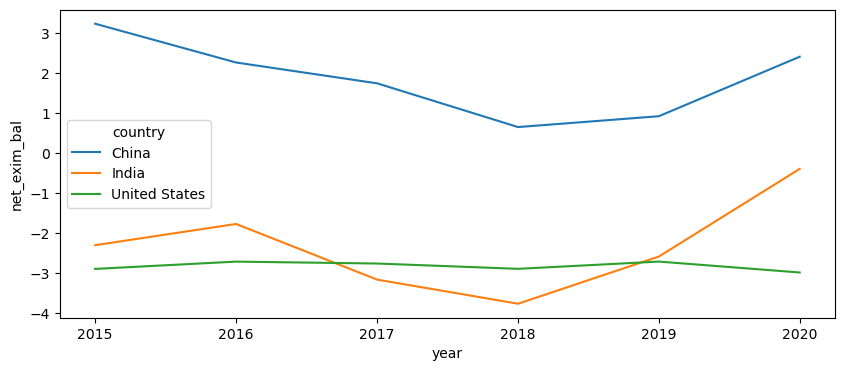

In [163]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['China', 'India', 'United States'])], hue='country', ci=False)
plt.show()

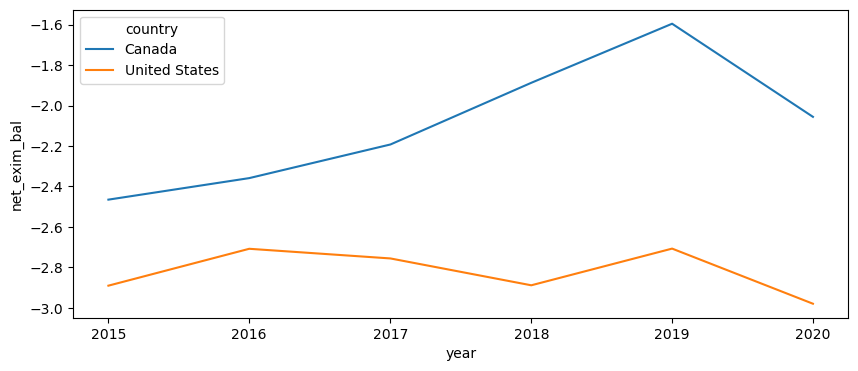

In [164]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Canada', 'United States'])], hue='country', ci=False)
plt.show()

In [198]:
import plotly.express as px

In [199]:
fig = px.scatter(x=dff['year'], y=dff['net_exim_bal'], color=dff['country'], trendline="ols")
fig.show()

In [208]:
df = px.data.gapminder()
fig = px.scatter_3d(df, x=dff['year'], y=dff['net_exim_bal'], z=dff['country'].isin(['Canada', 'United States']), color=dff['country'])
fig.show()